# Loading Modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/covertype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81048 entries, 0 to 81047
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           81048 non-null  int64  
 1   Aspect                              81048 non-null  int64  
 2   Slope                               81048 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    81048 non-null  int64  
 4   Vertical_Distance_To_Hydrology      81048 non-null  int64  
 5   Horizontal_Distance_To_Roadways     81048 non-null  int64  
 6   Hillshade_9am                       81048 non-null  int64  
 7   Hillshade_Noon                      81048 non-null  int64  
 8   Hillshade_3pm                       81048 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  81048 non-null  int64  
 10  Wilderness_Area1                    81048 non-null  int64  
 11  Wilderness_Area2                    81048

In [4]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,...,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000,81047.000000
mean,2863.367170,137.453971,11.947240,257.600220,35.811504,3373.628598,218.064160,225.083705,138.952213,3716.456932,...,0.008514,0.007601,0.000271,0.001259,0.000123,0.000420,0.009908,0.010648,0.009081,2.181907
std,245.861248,103.541269,6.767551,206.753854,44.964631,1803.925368,21.441066,17.123468,32.142939,1841.947758,...,0.091876,0.086850,0.016474,0.035454,0.011107,0.020478,0.099044,0.102640,0.094862,1.307606
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2724.000000,54.000000,7.000000,95.000000,6.000000,1740.000000,208.000000,216.000000,121.000000,2186.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2903.000000,108.000000,11.000000,212.000000,23.000000,3454.000000,222.000000,227.000000,139.000000,3929.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3011.000000,203.000000,15.000000,371.000000,52.000000,4913.500000,232.000000,237.000000,159.000000,5295.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Insights from the statistical summary
- Some Columns like (Elevation,Slope) have high variance, but I am not going to standarize it because the models i am going to use won't be affected
- The mean of 'cover_type' column is low which indicates that the classes are imbalanced

#### Converting 'Aspect' column using sine and cosine because it is a cyclical feature

In [7]:
df['Aspect_rad'] = np.deg2rad(df['Aspect'])  # Convert degrees to radians
df['Aspect_sin'] = np.sin(df['Aspect_rad'])
df['Aspect_cos'] = np.cos(df['Aspect_rad'])

In [8]:
df[['Aspect_sin','Aspect_cos']]

,Aspect_sin,Aspect_cos
0,0.777146,0.629320
1,0.829038,0.559193
2,0.656059,-0.754710
3,0.422618,-0.906308
4,0.707107,0.707107
...,...,...
81042,0.882948,0.469472
81043,0.857167,0.515038
81044,0.933580,0.358368
81045,0.965926,0.258819


In [9]:
df.drop(['Aspect','Aspect_rad'],axis=1,inplace=True)

#### Adding a new column for the names of the forest covers to help during EDA

In [10]:
cover_type_map = {  # From UCI Documentation
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}
df['Cover_name'] = df['Cover_Type'].map(cover_type_map)

In [11]:
df[['Cover_Type','Cover_name']]

,Cover_Type,Cover_name
0,5.0,Aspen
1,5.0,Aspen
2,2.0,Lodgepole Pine
3,2.0,Lodgepole Pine
4,5.0,Aspen
...,...,...
81042,2.0,Lodgepole Pine
81043,2.0,Lodgepole Pine
81044,2.0,Lodgepole Pine
81045,2.0,Lodgepole Pine


# EDA

#### Distribution of numerical features

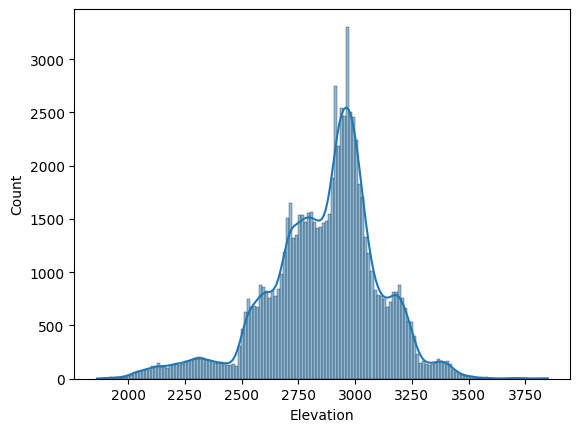

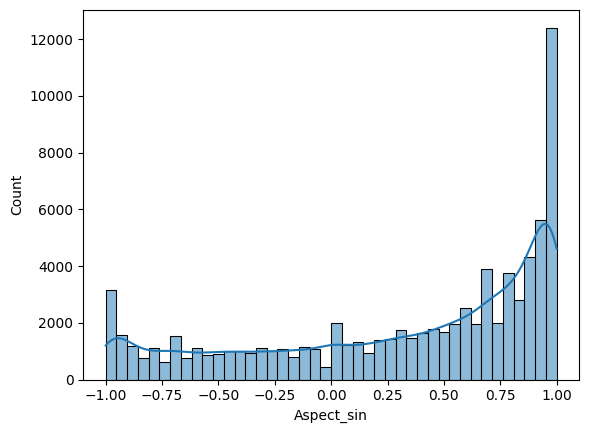

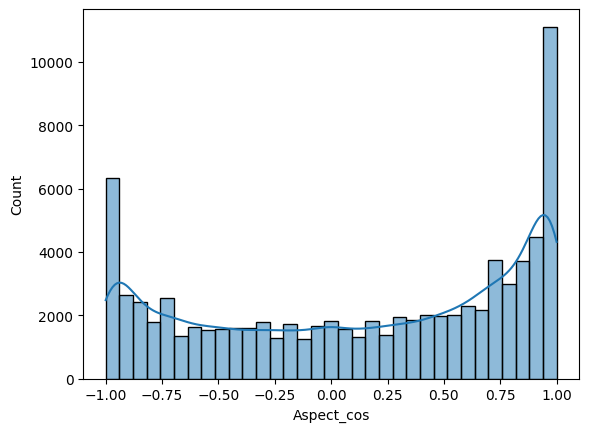

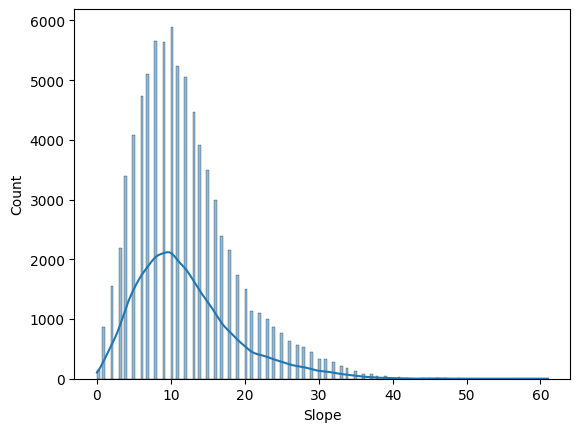

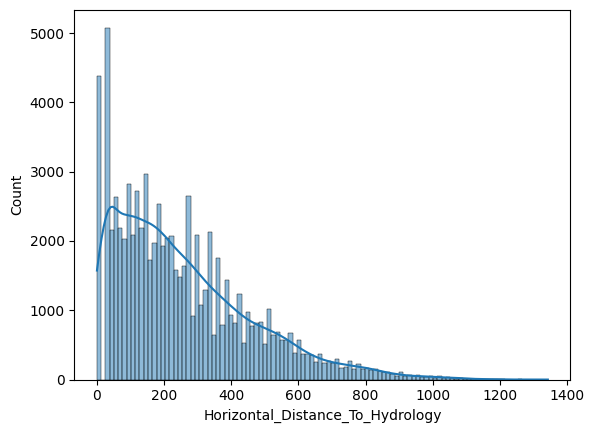

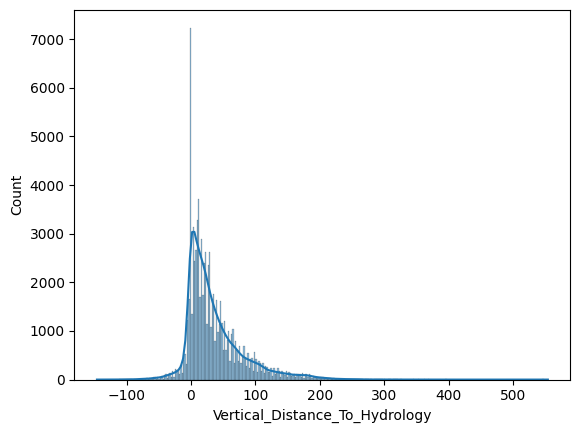

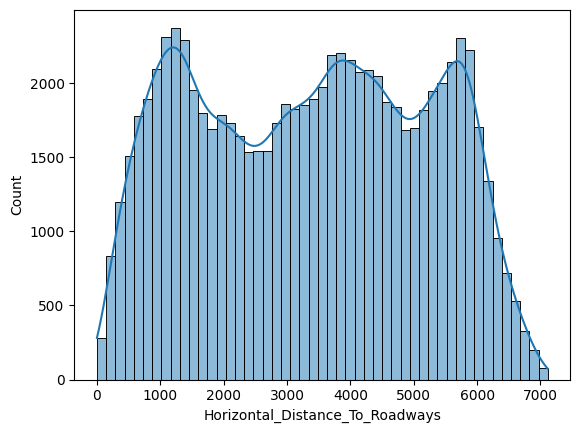

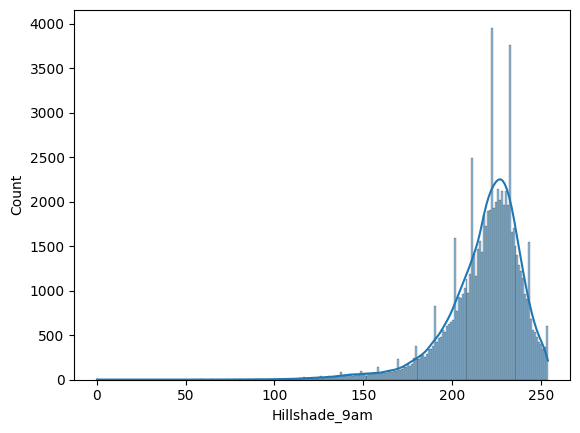

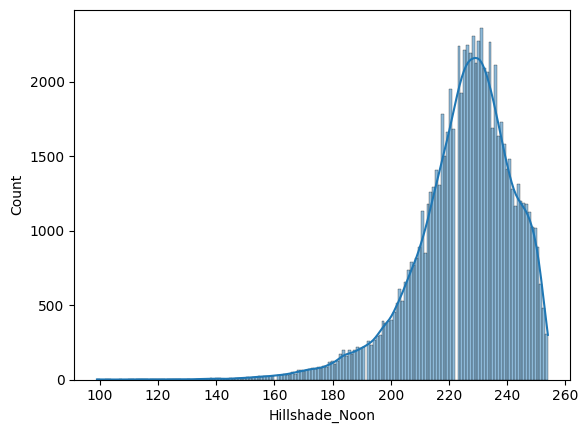

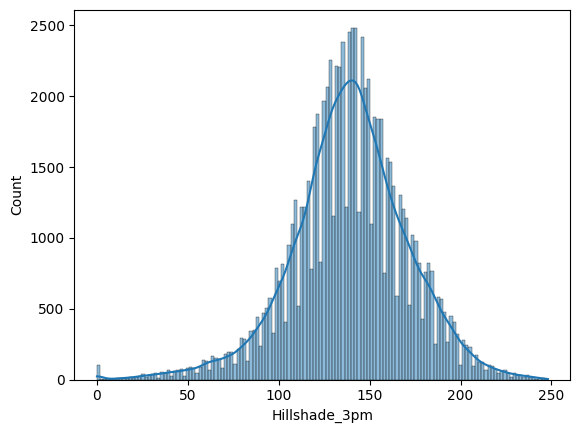

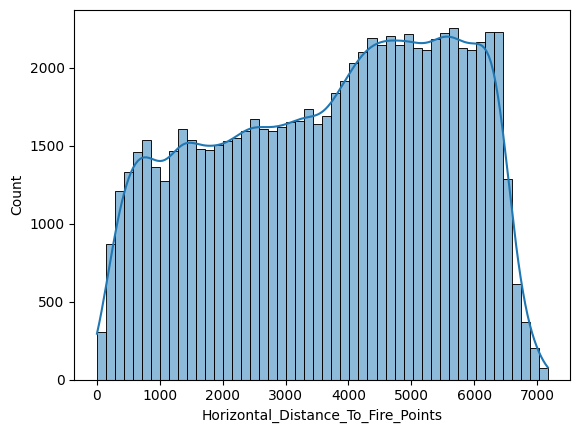

In [12]:
continuous_cols=['Elevation','Aspect_sin','Aspect_cos','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for col in continuous_cols:
    sns.histplot(df[col], kde=True)
    plt.show()


#### Class distribution of cover_type

In [13]:
df['Cover_name'].unique()

array(['Aspen', 'Lodgepole Pine', 'Spruce/Fir', 'Krummholz',
       'Ponderosa Pine', 'Douglas-fir', 'Cottonwood/Willow'], dtype=object)

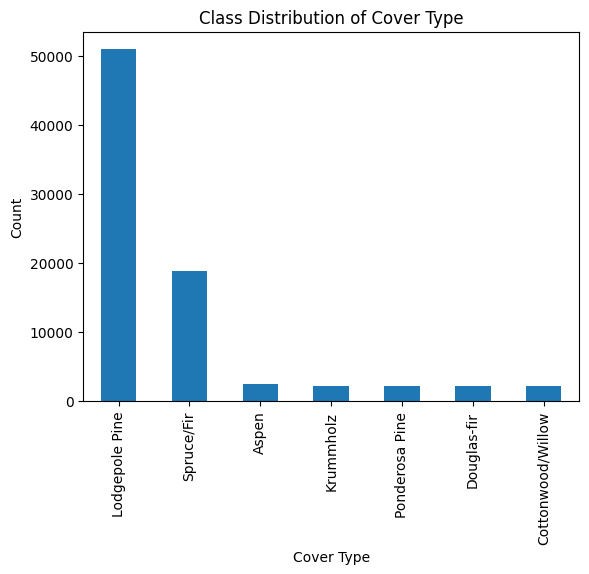

In [14]:
df['Cover_name'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

#### Distribution of each cover_type by numerical features

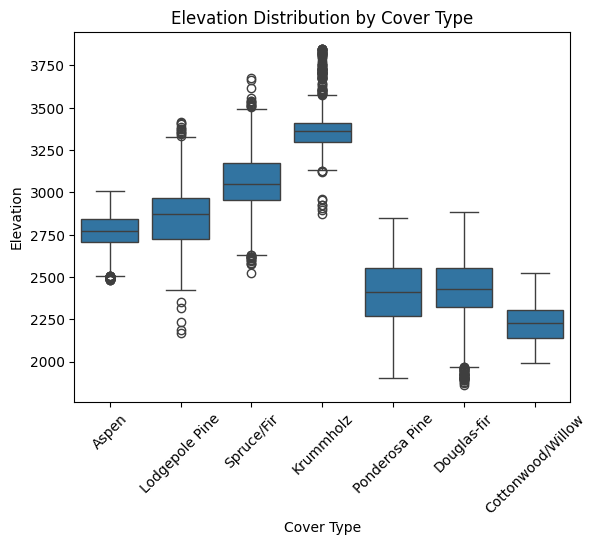

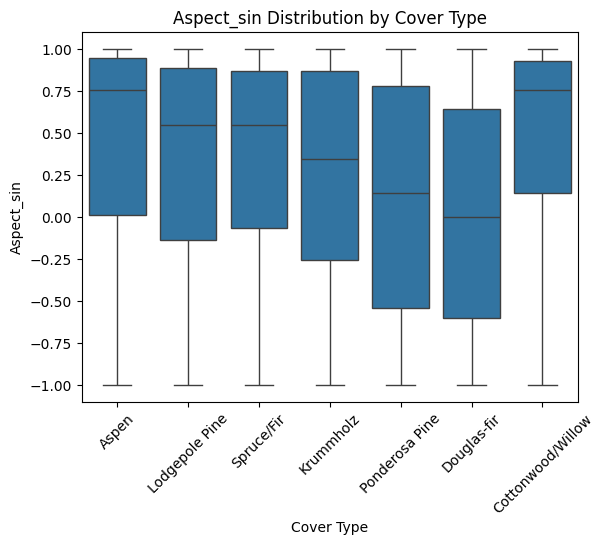

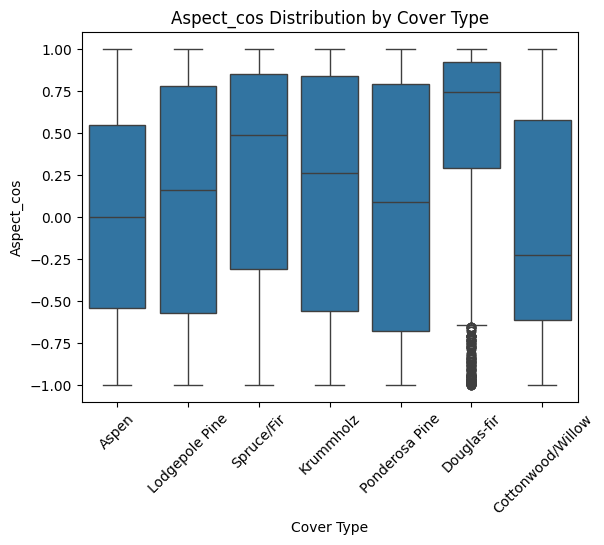

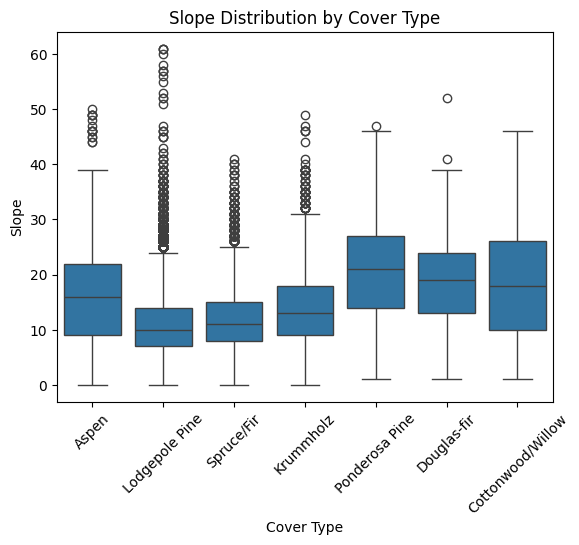

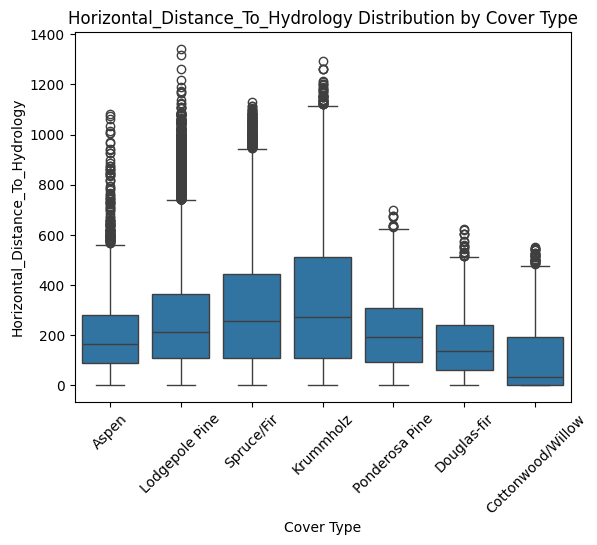

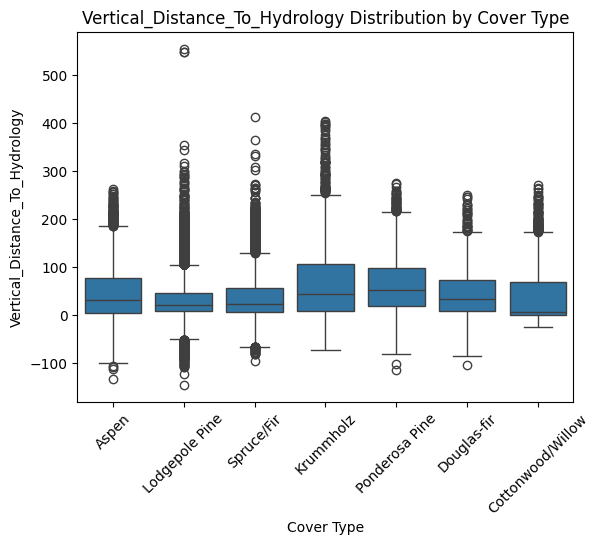

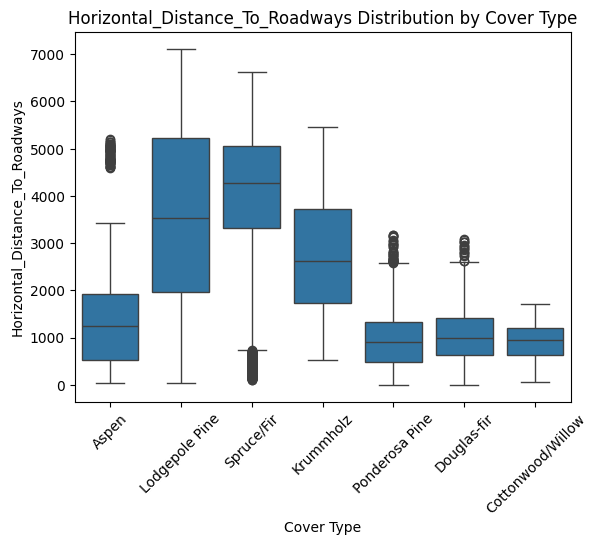

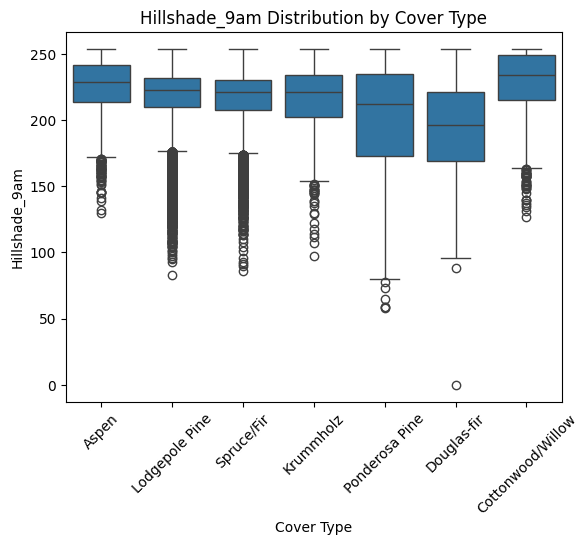

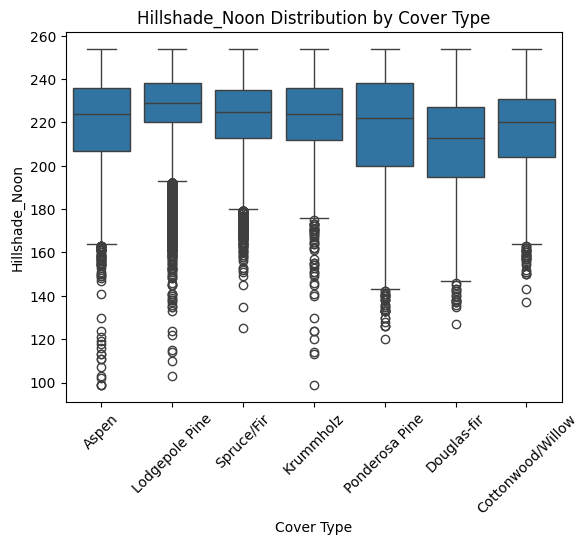

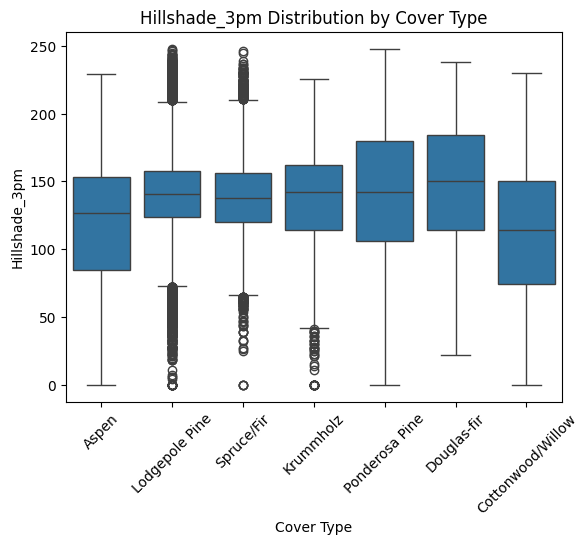

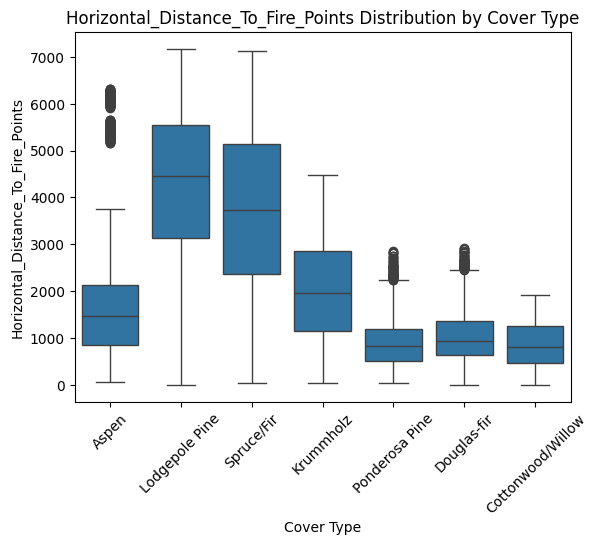

In [15]:
for col in continuous_cols:
    sns.boxplot(x='Cover_name', y=col, data=df)
    plt.xlabel('Cover Type')
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Cover Type')
    plt.xticks(rotation=45)
    plt.show()


We notice that 'Elevation' is the feature that seperates classes of 'cover_type' the best

#### Correlations heatmap

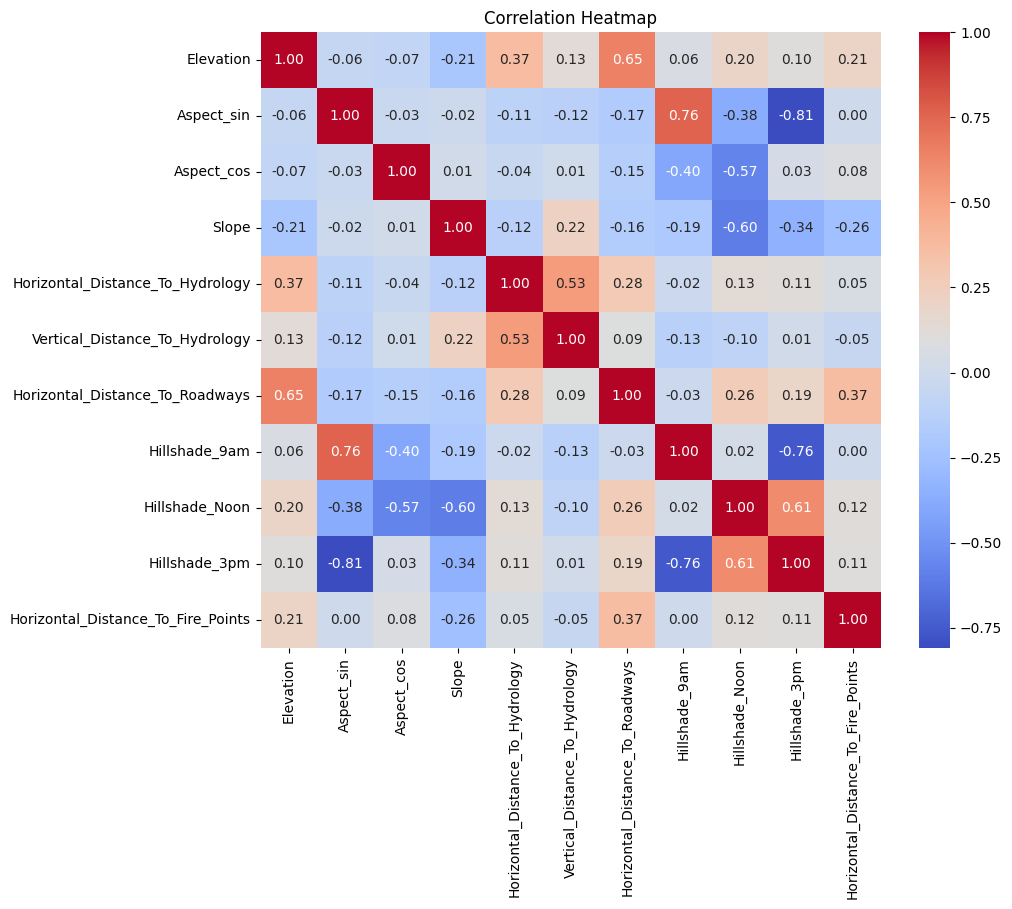

In [16]:
corr_matrix = df[continuous_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

There is some multicolinearity in the data

#### Feature engineering to deal with multicolinearity

In [17]:
df['Euclidean_Distance_To_Hydrology'] = np.sqrt(df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

hillshade_features = df[['Hillshade_9am', 'Hillshade_3pm']]

scaler = StandardScaler()
hillshade_scaled = scaler.fit_transform(hillshade_features)

pca = PCA(n_components=1)
hillshade_pca = pca.fit_transform(hillshade_scaled)


df['Hillshade_PCA_1'] = hillshade_pca[:, 0]


df.drop(['Hillshade_9am', 'Hillshade_3pm'], axis=1, inplace=True)


In [19]:
X=df.drop(['Cover_Type','Cover_name'],axis=1)
y=df['Cover_Type']
y = y - 1 # Because xgboost expects labels to start from 0

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) # Use stratified sampling to deal with imbalanced classes

# Model Building

In [21]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='gpu_hist',
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7, ...)

#### HyperParameter Tuning

In [22]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 3]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=25,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=7, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [23]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best Score: 0.9489334338822187


In [24]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.956631708821715
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      3772
         1.0       0.97      0.98      0.98     10198
         2.0       0.86      0.81      0.83       432
         3.0       0.95      0.97      0.96       432
         4.0       0.90      0.93      0.91       512
         5.0       0.83      0.89      0.86       432
         6.0       0.93      0.96      0.95       432

    accuracy                           0.96     16210
   macro avg       0.91      0.92      0.92     16210
weighted avg       0.96      0.96      0.96     16210

Confusion Matrix:
 [[3502  235    0    0   10    0   25]
 [ 171 9968    8    0   36   10    5]
 [   0    4  349   15    5   59    0]
 [   0    0   12  417    0    3    0]
 [   0   26    5    0  474    7    0]
 [   1    3   33    9    3  383    0]
 [  18    0    0    0    0    0  414]]


### Explaining Model Predictions using SHAP

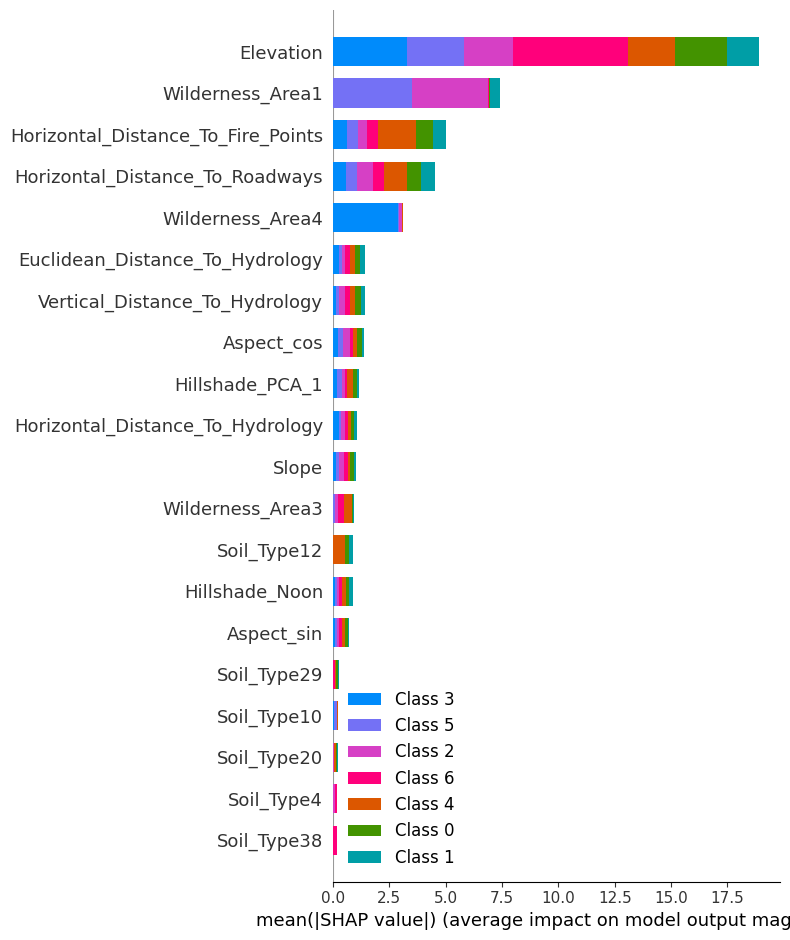

In [31]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
